In [1]:
from utils.task3_utils import *
from utils.task4_utils import *

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from kmodes.kmodes import KModes
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans

# Dataset 1: Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
dataset = 'breast_cancer'
df, target, num_classes = load_data(name=dataset, normalize=False)
algos = estimator_names = ['agglomerative', 'kmeans', 'gaussian']

In [3]:
%%time

minsup_values = np.arange(0.3, 1+0.1, 0.1)
best_minsup = tune_minsup(df, target, num_classes, minsup_values, algos)
print(f'Best minsup found: {best_minsup}\n')

Best minsup found: 0.35

CPU times: user 3min 11s, sys: 23.3 s, total: 3min 35s
Wall time: 44.6 s


Dataset:	breast_cancer
Num. classes:	2
Num. features:	30
Num. freq-itemsets:	39

Accuracy for voting classifier:	0.9104

V measure Score:	0.5509
Homogeneity Score:	0.5484
Completeness Score:	0.5534
Adj. Rand Score:	0.6720
Mutual Info Score:	0.3654
Adj. Mutual Info Score:	0.5503

Davies Bouldin Score:	1.1606
Silhouette Score:	0.3739


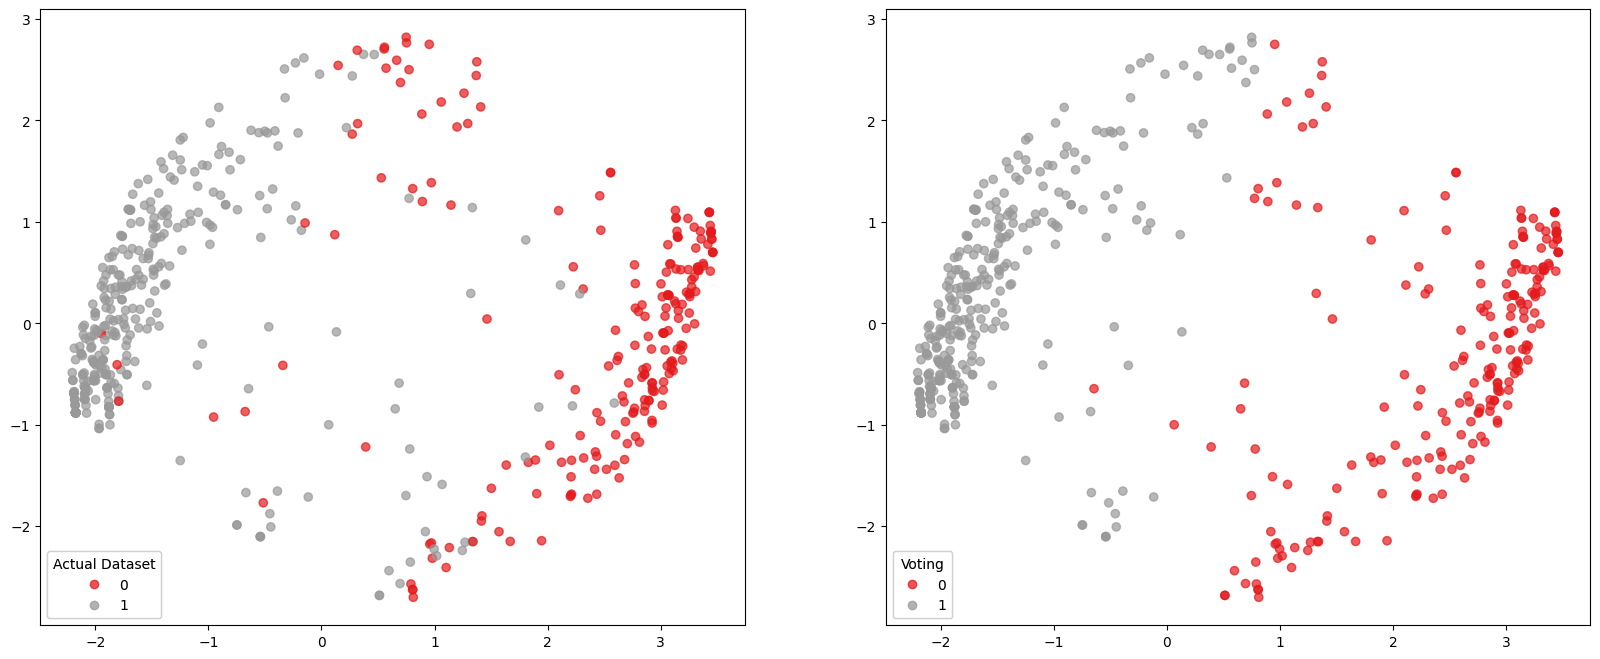

In [4]:
fi = get_frequent_itemsets(df, minsup=best_minsup)
df_new = make_cluster_df(df, fi)

print(f'Dataset:\t{dataset}')
print(f'Num. classes:\t{num_classes}')
print(f'Num. features:\t{df.shape[1]}')
print(f'Num. freq-itemsets:\t{fi.shape[0]}\n')

estimators = [
    AgglomerativeClustering(n_clusters=num_classes, linkage='average'),
    KMeans(n_clusters=num_classes, init='k-means++'),
    GaussianMixture(n_components=num_classes)
]

vc = VotingClassifier(estimators, 'hard', estimator_names)
ip = vc.fit_predict(df_new, target)
votes = vc.voting(ip, num_classes, len(df_new), target)

evaluate_clusters(votes, target, df_new)
plot_clusters(estimator_names, ip, votes, df_new, target, plot_all=False)

# Dataset 2: TBD

In [8]:
dataset = 'wine'
df, target, num_classes = load_data(name=dataset, normalize=False)
algos = estimator_names = ['agglomerative', 'kmeans', 'gaussian']

In [9]:
%%time

minsup_values = np.arange(0.1, 1+0.1, 0.1)
best_minsup = tune_minsup(df, target, num_classes, minsup_values, algos)
print(f'Best minsup found: {best_minsup}\n')

Best minsup found: 0.3

CPU times: user 11min 17s, sys: 47.4 s, total: 12min 4s
Wall time: 3min 11s


Dataset:	wine
Num. classes:	3
Num. features:	13
Num. freq-itemsets:	54

Accuracy for voting classifier:	0.6348

V measure Score:	0.5264
Homogeneity Score:	0.6458
Completeness Score:	0.4443
Adj. Rand Score:	0.4305
Mutual Info Score:	0.4825
Adj. Mutual Info Score:	0.5197

Davies Bouldin Score:	1.4136
Silhouette Score:	0.3385


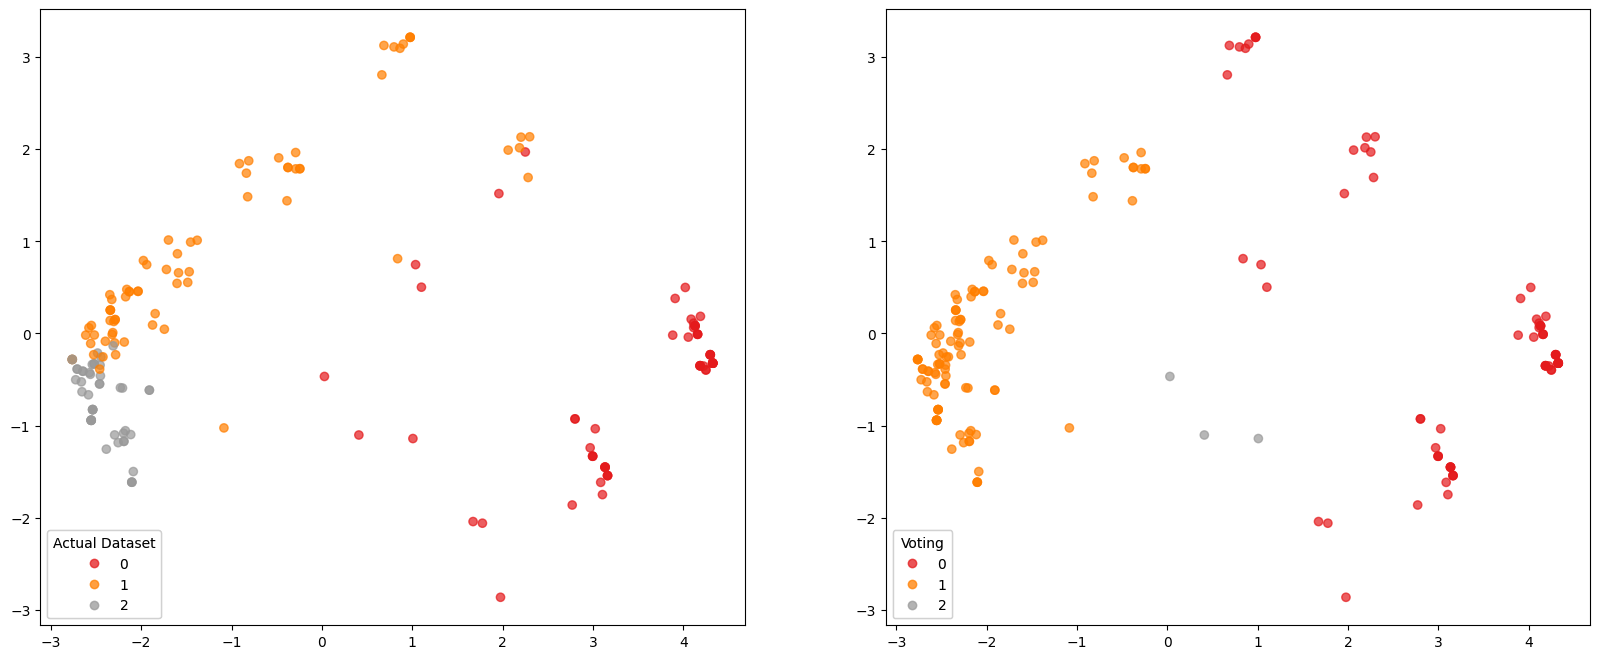

In [10]:
fi = get_frequent_itemsets(df, minsup=best_minsup)
df_new = make_cluster_df(df, fi)

print(f'Dataset:\t{dataset}')
print(f'Num. classes:\t{num_classes}')
print(f'Num. features:\t{df.shape[1]}')
print(f'Num. freq-itemsets:\t{fi.shape[0]}\n')

estimators = [
    AgglomerativeClustering(n_clusters=num_classes, linkage='average'),
    KMeans(n_clusters=num_classes, init='k-means++'),
    GaussianMixture(n_components=num_classes)
]

vc = VotingClassifier(estimators, 'hard', estimator_names)
ip = vc.fit_predict(df_new, target)
votes = vc.voting(ip, num_classes, len(df_new), target)

evaluate_clusters(votes, target, df_new)
plot_clusters(estimator_names, ip, votes, df_new, target, plot_all=False)